In [7]:
%matplotlib notebook
# %matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
import numpy as np
import pandas as pd  
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
from datetime import time, timedelta, datetime
from dateutil.relativedelta import relativedelta
from scipy.stats import chi2
# from whakaari import datetimeify
# from tsfresh.transformers import FeatureSelector
from textwrap import wrap
from matplotlib.animation import FuncAnimation,PillowWriter
import os
import re
import h5py
import obspy


In [8]:
p_ini=[3.91, 3.74, 3.63,3.91,(3.74+3.63)/2, 3.59, 4.07]###static interval pressure, MPa for int8 phase 1, int9 phase1, int10 phase 1; int8 cycle 2 phase2;int9_10 phase2; int11 phase 2a
K_trans=[1.38e-15, 1.81e-16, 1.02e-16,1.5e-15, 3.06e-16, 5.57e-16, 5.89e-16]
K_m =[2.96e-15,6.64e-16, 4.13e-16, 5.91e-15, 2.2e-15, 1.5e-15, 1.42e-15]
p_peak=[15.45,15.93,15.33,17.79, 17.71, 20.48,21.225]

<IPython.core.display.Javascript object>


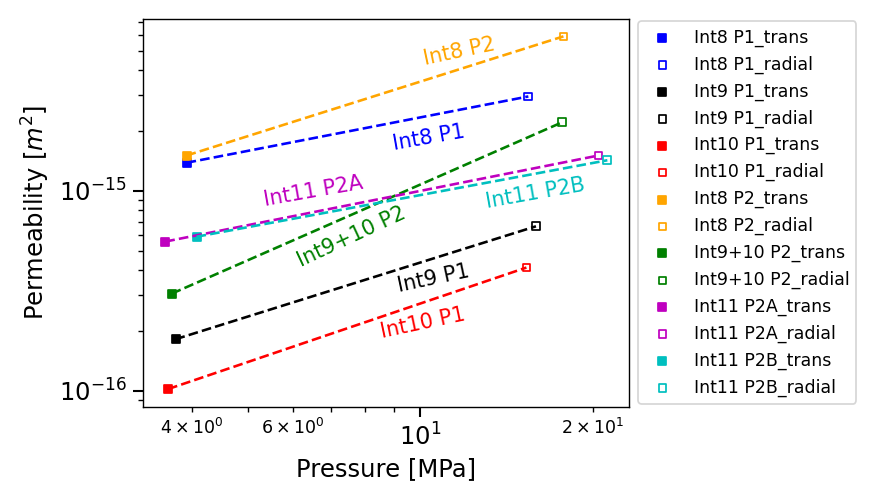

In [9]:
f,ax=plt.subplots(1,1,figsize=(7,4))
tkw=dict(size=6,width=1.2)
fz=14
ax.scatter(p_ini[0],K_trans[0],s=20,marker='s',c='b',label='Int8 P1_trans')
ax.scatter(p_peak[0],K_m[0],s=20,marker='s',facecolors='none', edgecolors='b',label='Int8 P1_radial')
ax.plot([p_ini[0], p_peak[0]],[K_trans[0],K_m[0]], 'b--')
# Calculate the midpoint for the annotation
mid_x = (p_ini[0] + p_peak[0]) / 2
mid_y = (K_trans[0] + K_m[0]) / 2
# Calculate the slope and angle for rotation
slope = (K_m[0] - K_trans[0]) / (p_peak[0] - p_ini[0])
angle = np.degrees(np.arctan(slope))
# Add the annotation
ax.annotate('Int8 P1', xy=(mid_x, mid_y), xytext=(mid_x, mid_y-15),
            textcoords='offset points', ha='center', color='blue', fontsize=fz-2, rotation=10)


ax.scatter(p_ini[1],K_trans[1],s=20,marker='s',c='k',label='Int9 P1_trans')
ax.scatter(p_peak[1],K_m[1],s=20,marker='s',facecolors='none', edgecolors='k',label='Int9 P1_radial')
ax.plot([p_ini[1], p_peak[1]],[K_trans[1],K_m[1]], 'k--')
# Calculate the midpoint for the annotation
mid_x = (p_ini[1] + p_peak[1]) / 2
mid_y = (K_trans[1] + K_m[1]) / 2
# Add the annotation
ax.annotate('Int9 P1', xy=(mid_x, mid_y), xytext=(mid_x, mid_y-15),
            textcoords='offset points', ha='center', color='black', fontsize=fz-2, rotation=12)


ax.scatter(p_ini[2],K_trans[2],s=20,marker='s',c='r',label='Int10 P1_trans')
ax.scatter(p_peak[2],K_m[2],s=20,marker='s',facecolors='none', edgecolors='r',label='Int10 P1_radial')
ax.plot([p_ini[2], p_peak[2]],[K_trans[2],K_m[2]], 'r--')
# Calculate the midpoint for the annotation
mid_x = (p_ini[2] + p_peak[2]) / 2
mid_y = (K_trans[2] + K_m[2]) / 2
# Add the annotation
ax.annotate('Int10 P1', xy=(mid_x, mid_y), xytext=(mid_x, mid_y-17),
            textcoords='offset points', ha='center', color='r', fontsize=fz-2, rotation=12)


ax.scatter(p_ini[3],K_trans[3],s=20,marker='s',c='orange',label='Int8 P2_trans')
ax.scatter(p_peak[3],K_m[3],s=20,marker='s',facecolors='none', edgecolors='orange',label='Int8 P2_radial')
ax.plot([p_ini[3], p_peak[3]],[K_trans[3],K_m[3]], linestyle='--',color='orange')
# Calculate the midpoint for the annotation
mid_x = (p_ini[3] + p_peak[3]) / 2
mid_y = (K_trans[3] + K_m[3]) / 2
# Add the annotation
ax.annotate('Int8 P2', xy=(mid_x, mid_y), xytext=(mid_x, mid_y+7),
            textcoords='offset points', ha='center', color='orange', fontsize=fz-2, rotation=12)



ax.scatter(p_ini[4],K_trans[4],s=20,marker='s',c='green',label='Int9+10 P2_trans')
ax.scatter(p_peak[4],K_m[4],s=20,marker='s',facecolors='none', edgecolors='green',label='Int9+10 P2_radial')
ax.plot([p_ini[4], p_peak[4]],[K_trans[4],K_m[4]], linestyle='--',color='green')
# Calculate the midpoint for the annotation
mid_x = (p_ini[4] + p_peak[4]) / 2
mid_y = (K_trans[4] + K_m[4]) / 2
# Add the annotation
ax.annotate('Int9+10 P2', xy=(mid_x, mid_y), xytext=(mid_x-60, mid_y-55),
            textcoords='offset points', ha='center', color='green', fontsize=fz-2, rotation=25)


ax.scatter(p_ini[5],K_trans[5],s=20,marker='s',c='m',label='Int11 P2A_trans')
ax.scatter(p_peak[5],K_m[5],s=20,marker='s',facecolors='none', edgecolors='m',label='Int11 P2A_radial')
ax.plot([p_ini[5], p_peak[5]],[K_trans[5],K_m[5]], linestyle='--',color='m')
# Calculate the midpoint for the annotation
mid_x = (p_ini[5] + p_peak[5]) / 2
mid_y = (K_trans[5] + K_m[5]) / 2
# Add the annotation
ax.annotate('Int11 P2A', xy=(mid_x, mid_y), xytext=(mid_x-100, mid_y-10),
            textcoords='offset points', ha='center', color='m', fontsize=fz-2, rotation=10)


ax.scatter(p_ini[6],K_trans[6],s=20,marker='s',c='c',label='Int11 P2B_trans')
ax.scatter(p_peak[6],K_m[6],s=20,marker='s',facecolors='none', edgecolors='c',label='Int11 P2B_radial')
ax.plot([p_ini[6], p_peak[6]],[K_trans[6],K_m[6]], linestyle='--',color='c')
# Calculate the midpoint for the annotation
mid_x = (p_ini[6] + p_peak[6]) / 2
mid_y = (K_trans[6] + K_m[6]) / 2
# Add the annotation
ax.annotate('Int11 P2B', xy=(mid_x, mid_y), xytext=(mid_x+20, mid_y-10),
            textcoords='offset points', ha='center', color='c', fontsize=fz-2, rotation=10)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Pressure [MPa]',fontsize=fz)
ax.set_ylabel(r'Permeability [$m^2$]',fontsize=fz)
ax.legend(loc='best')

# Place the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)#, columnspacing=1.0

# Adjust tick parameters
ax.tick_params(axis='both', which='major', **tkw)
ax.tick_params(axis='both', which='minor', size=3, width=0.8)  # Minor ticks

# Adjust tick label size
ax.xaxis.set_tick_params(labelsize=fz)
ax.yaxis.set_tick_params(labelsize=fz)
plt.tight_layout()
# plt.subplots_adjust(bottom=0.4)  # Increase the bottom margin